In [1]:
try:
  from empiricaldist import Pmf
except:
  !pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11972 sha256=042cf9fe9a145de909846d2fe16409da72c88e4b4ef97c7c13287952688ebdf3
  Stored in directory: /root/.cache/pip/wheels/dd/dc/1c/c472efa84814edbb5b67d132ad3950534d0d7fd808543a659c
Successfully built empiricaldist


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from empiricaldist import Pmf


In [3]:
def update_dice(pmf, data):
  """Update pmf based on new data."""
  hypos= pmf.qs
  likelihood = 1/hypos
  impossible = (data > hypos)
  likelihood[impossible] = 0
  pmf*=likelihood
  pmf.normalize()

# **Exercise 3-1**
___
Suppose I have a box with a 6-sided die, 8-sided die and a 12-sided die. I choose one of the dice at random, roll it four times, and get 1,3,4 and 7. 

What is the probability that I chose the 8-sided die?

In [4]:
hypos=[6,8,12] # sided dies

In [10]:
pmf = Pmf(1/3,hypos)

In [11]:
outcomes=[1,2,4,7]
for i in outcomes:
  update_dice(pmf,i)
pmf

,probs
6,0.000000
8,0.835052
12,0.164948


 the probability that I chose the 8-sided die is 84%

# **Exercise 3-2**
___
In the previous version of the Dice problem, the prior probabilities are the same because the box contains one of each die. But suppose the box contains 
 * 1 dice, that is 4 sided, 
 * 2 dies that are 6-sided, 
 * 3-dies that are 8 sided, 
 * 4-dies that are 12-sided
 * 5-dies that are 20 sided.
 
I choose a die, roll and get a 7. What is the probability that I chose an 8 sided die?


In [34]:
hypos=[4, 6, 6, 8, 8, 8, 12, 12, 12, 12, 20, 20, 20, 20, 20]

In [35]:
outcome=7

In [36]:
pmf32= Pmf(1/len(hypos),hypos) 
pmf32.normalize()
pmf32

,probs
4,0.066667
6,0.066667
6,0.066667
8,0.066667
8,0.066667
8,0.066667
12,0.066667
12,0.066667
12,0.066667
12,0.066667


In [37]:
update_dice(pmf32,outcome)
pmf32

,probs
4,0.000000
6,0.000000
6,0.000000
8,0.130435
8,0.130435
8,0.130435
12,0.086957
12,0.086957
12,0.086957
12,0.086957


Text(0.5, 0, 'dice #')

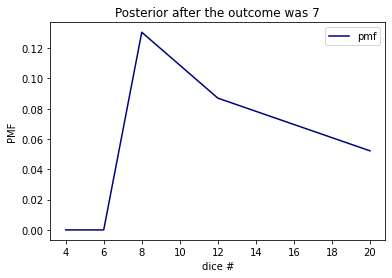

In [41]:
plt.plot(pmf32,color='navy')
plt.legend(['pmf'])
plt.title("Posterior after the outcome was 7")
plt.ylabel('PMF')
plt.xlabel("dice #")

# **Exercise 3-3**
Suppose I have two sock drawers. 

* One contains equal numbers of black and white socks. (1/2,1/2)
* Other contains equal numbers of red, green and blue socks(1/3,1/3,1/3)

Suppose I choose a drawer at random, choose two socks at random, and I tell you that I got a matching pair. 

What is probability that the socks are White?

In [140]:
hypos33=['white','black','red','green','blue']

In [141]:
pmf33=Pmf(1,hypos33)
pmf33.normalize()
pmf33

,probs
white,0.2
black,0.2
red,0.2
green,0.2
blue,0.2


In [143]:
likelihood1=[1/2,1/2,1/3,1/3,1/3]
posterior1=pmf33*likelihood1
posterior1.normalize()
posterior1*=2
posterior1.normalize()
posterior1

,probs
white,0.250000
black,0.250000
red,0.166667
green,0.166667
blue,0.166667


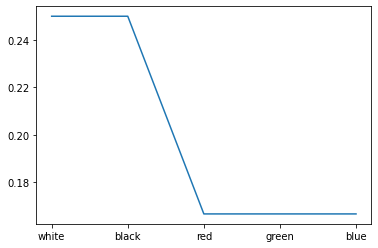

In [144]:
plt.plot(posterior1)

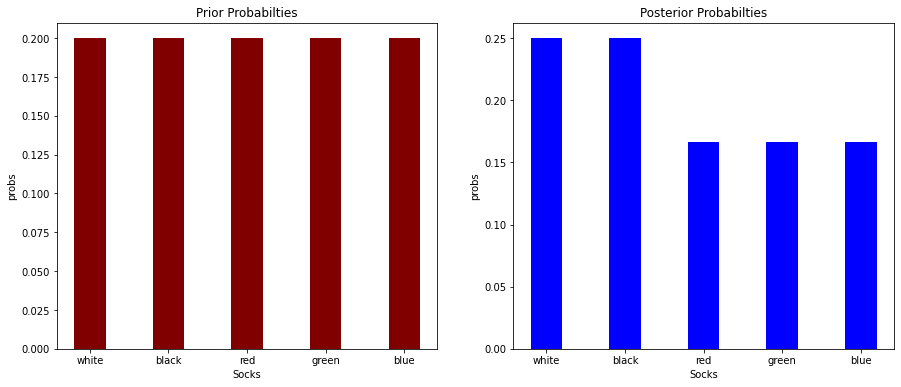

In [145]:
plt.figure(figsize=(15,6))

df=pd.DataFrame(columns=['probs'])
df['probs'] = pmf33
plt.subplot(1,2,1)
plt.bar(df.index.values, df['probs'], color ='maroon',
        width = 0.4)
plt.title("Prior Probabilties")
plt.xlabel("Socks")
plt.ylabel("probs")

df1=pd.DataFrame(columns=['probs'])
df1['probs'] = posterior1

plt.subplot(1,2,2)
plt.bar(df.index.values, df1['probs'], color ='blue',
        width = 0.4)
plt.title("Posterior Probabilties")
plt.xlabel("Socks")
plt.ylabel("probs")

plt.show()

# **Exercise 3-4**
___

Elvis Presley had a twin brother (who died at birth). What is the probabilty that Elvis was an Identical Twin?

In [138]:
hypos=['Identical','Fraternal']
pmf=Pmf(1,hypos)
pmf.normalize()
pmf

,probs
Identical,0.5
Fraternal,0.5


In [139]:
likelihood=[1/3,2/3]
posterior= pmf * likelihood
posterior.normalize()
posterior

,probs
Identical,0.333333
Fraternal,0.666667
